# Yulu
By- Charanjeet Bhatia

Yulu, India's premier micro-mobility service provider, offers innovative transportation solutions for daily commutes. Originally conceived to tackle India's traffic congestion, Yulu provides safe and sustainable commuting options through its user-friendly mobile app. Yulu zones strategically dot various locations such as metro stations, bus stands, offices, and residential areas, facilitating smooth and affordable first and last-mile connectivity.

Recently, Yulu has experienced significant declines in revenue. To address this, they've engaged a consulting firm to analyze the determinants of demand for shared electric cycles in the Indian market. Specifically, they seek insights into the factors influencing the demand for these cycles.

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(path)

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.shape[0]

10886

In [12]:
df.shape[1]

12

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The data types of the following attributes need to be changed to their proper data types:

- datetime: to datetime
- season: to categorical
- holiday: to categorical
- workingday: to categorical
- weather: to categorical

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
cols= ['season', 'holiday', 'workingday', 'weather']
df[['season', 'holiday', 'workingday', 'weather']] = df[['season', 'holiday', 'workingday', 'weather']].astype('object')

In [11]:
df.iloc[:, 1:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


The dataset contains no missing values. However, there may be outliers in the 'casual' and 'registered' attributes. This suspicion arises because the mean and median values for these attributes are significantly distant from each other, indicating potential skewness in the data distribution. Additionally, the high standard deviation suggests a considerable variance in the data of these attributes.

In [17]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The dataset does not contain any missing values.

In [22]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [14]:
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

 **Univariate Analysis**

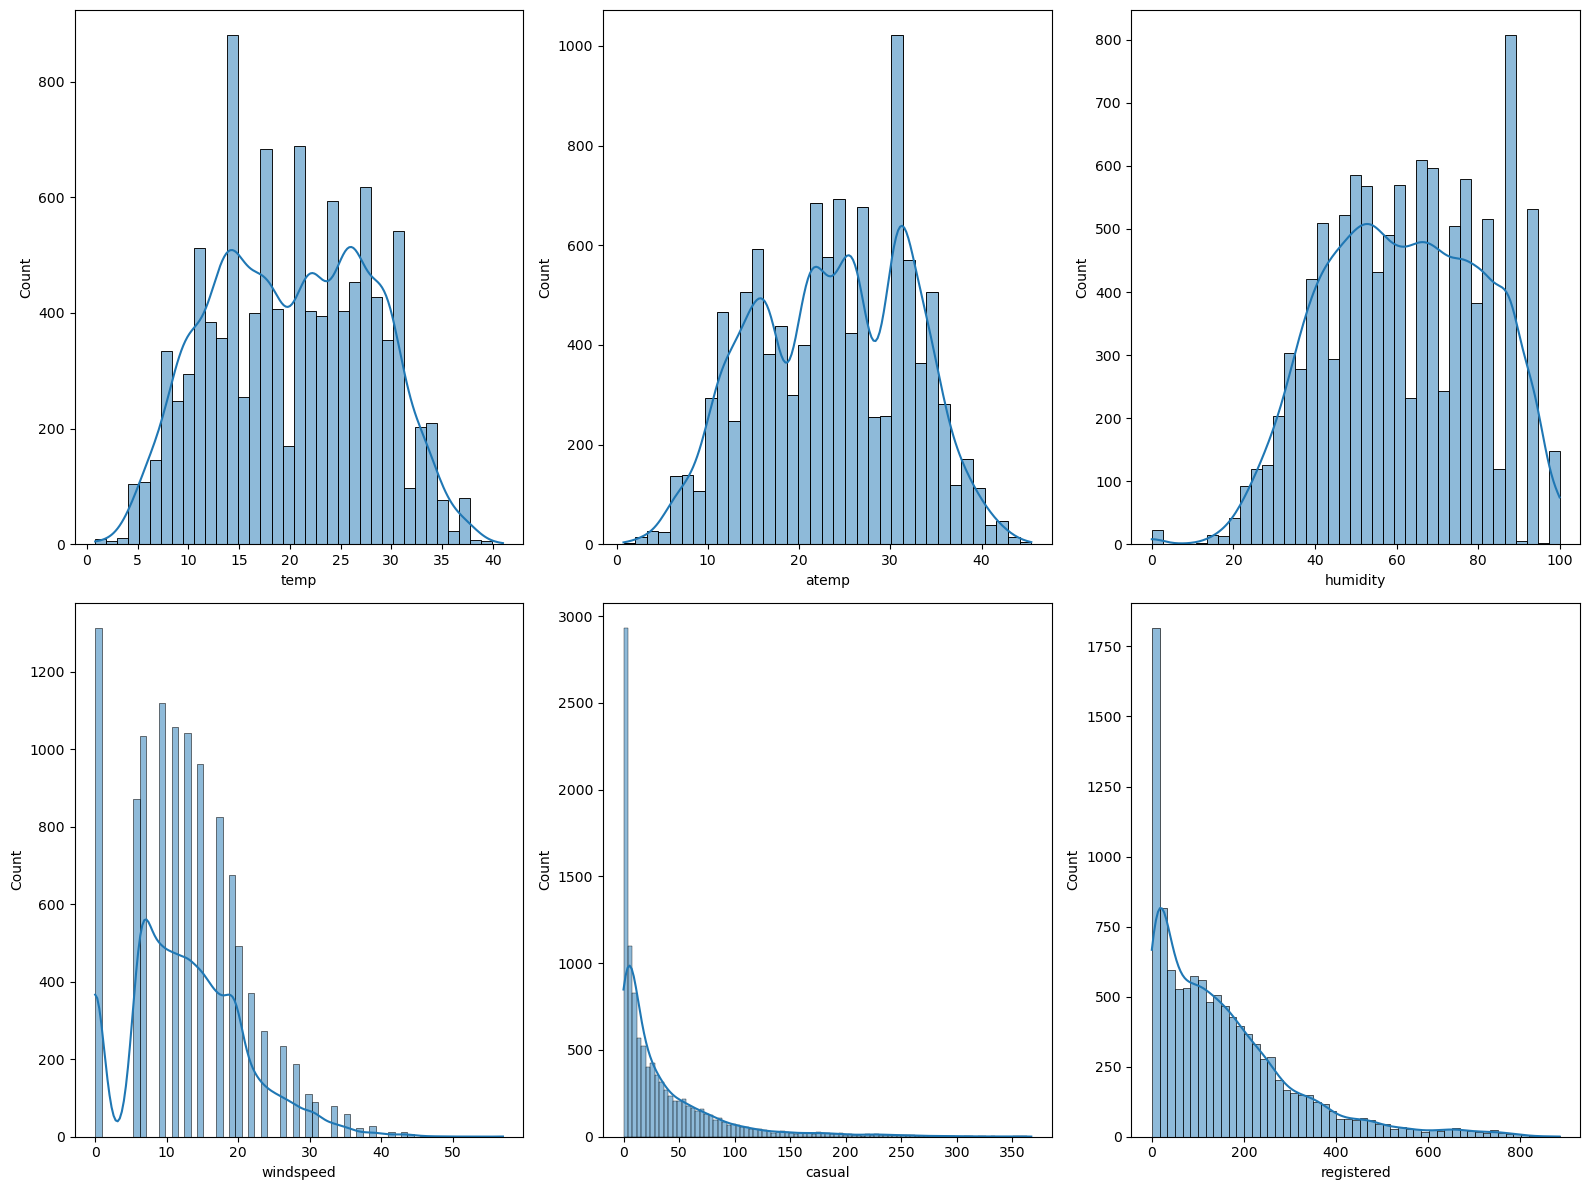

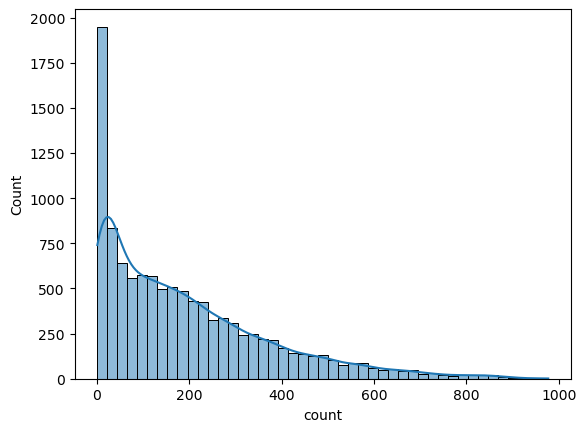

In [19]:
numCols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

for i, col in enumerate(numCols[:-1]):
    sns.histplot(df[col], ax=axes[i // 3, i % 3], kde=True)

plt.tight_layout()  
plt.show()

sns.histplot(df[numCols[-1]], kde=True)
plt.show()

The distributions of 'casual', 'registered', and 'count' resemble a Log Normal Distribution. 'temp', 'atemp', and 'humidity' exhibit characteristics of a Normal Distribution. 'windspeed' follows a Binomial Distribution.

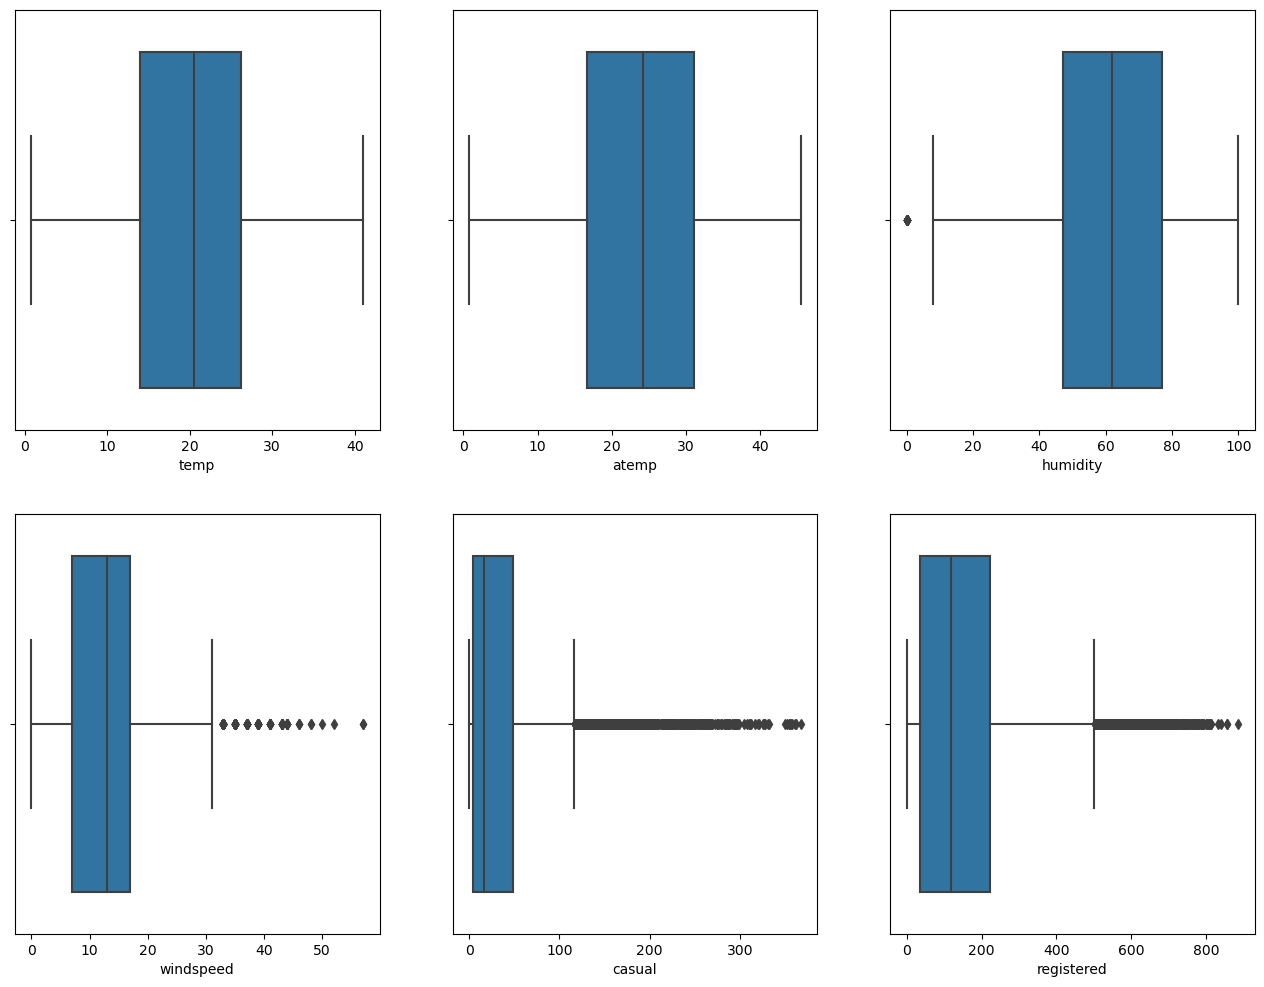

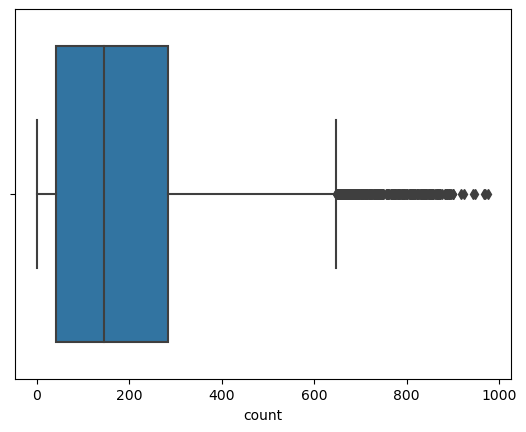

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[numCols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=df[numCols[-1]])
plt.show()

* Looks like humidity, casual, registered and count have outliers in the data.

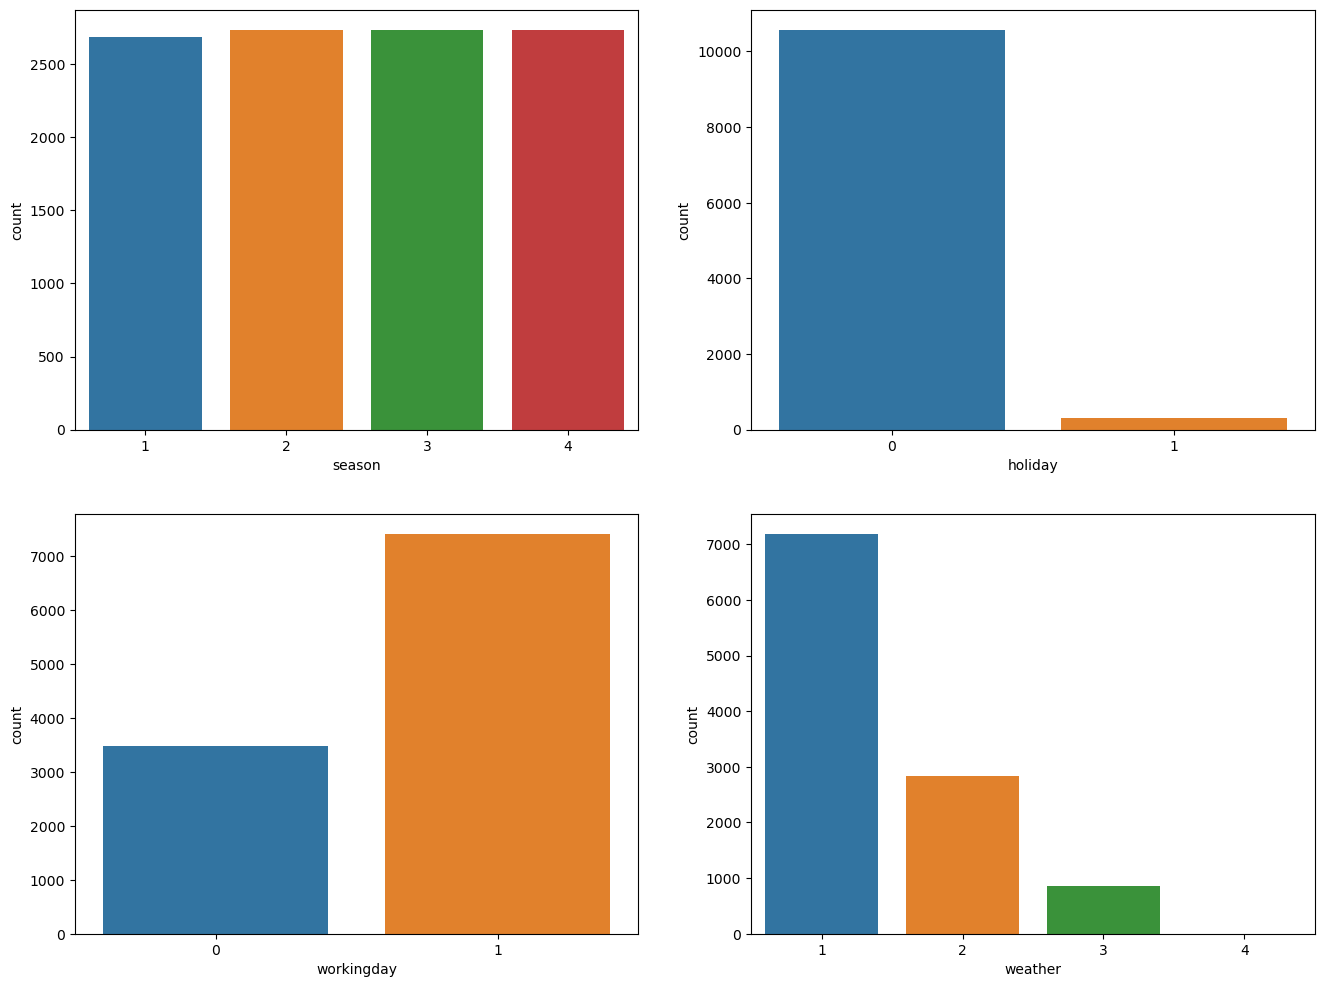

In [43]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

**Bi-variate Analysis**

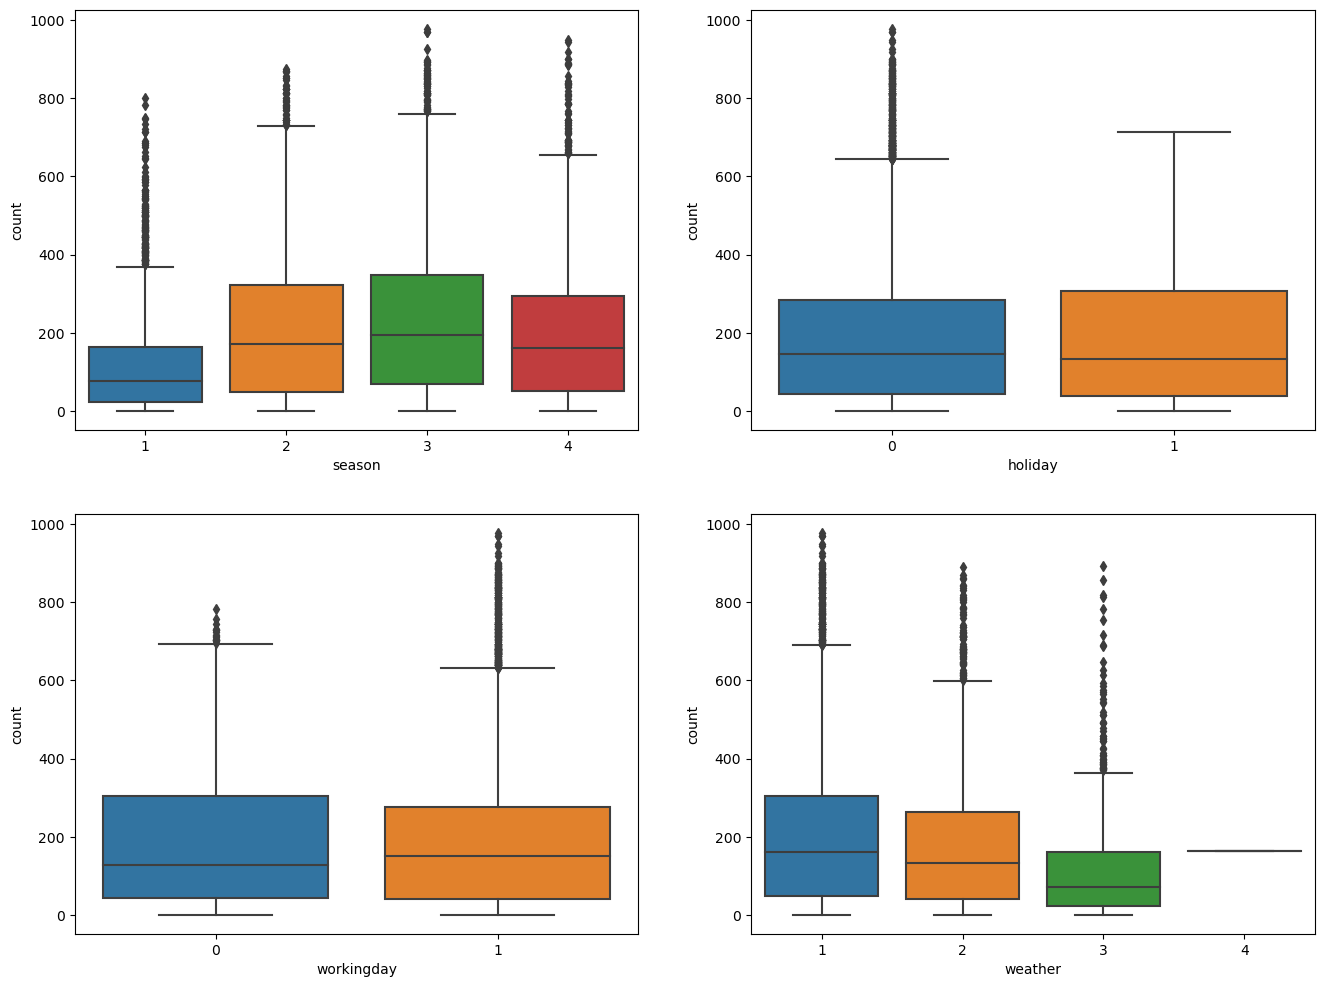

In [42]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cols[index], y='count', ax=axis[row, col])
        index += 1
plt.show()

1. Bike rentals peak during the summer and fall seasons, surpassing other times of the year.
2. Holidays consistently experience higher bike rental rates.
3. Weekends and holidays also witness a slight uptick in bike rentals.
4. Inclement weather conditions such as rain, thunderstorms, snow, or fog are associated with decreased bike rentals.

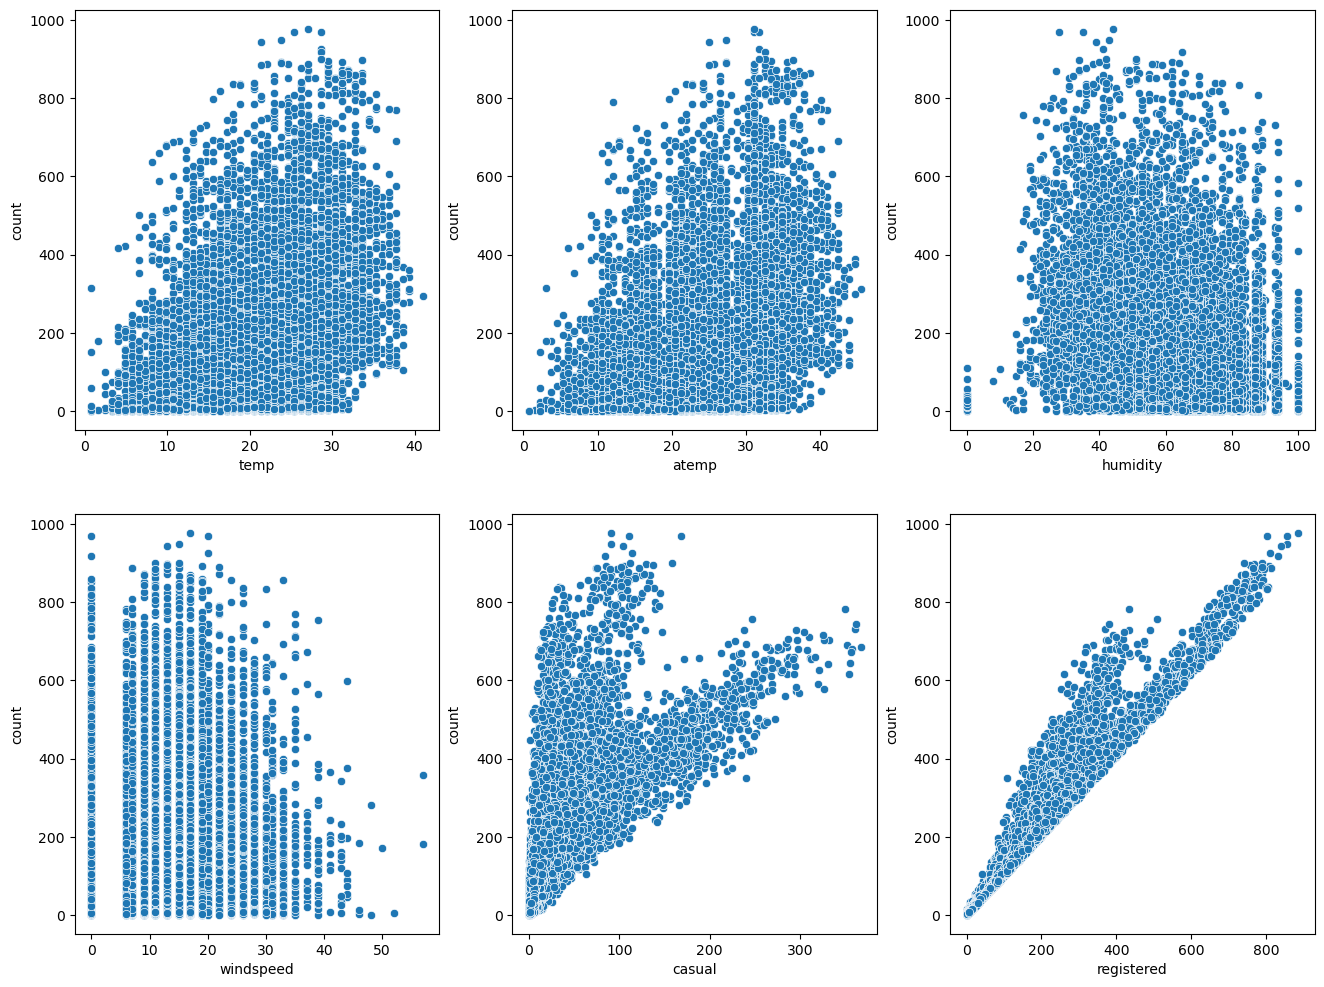

In [25]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=numCols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

1. Bike rentals significantly decrease when humidity levels drop below 20.
2. Rentals also decline when temperatures fall below 10 degrees Celsius.
3. High winds, exceeding 35 km/h, correlate with reduced bike rental activity.

In [26]:
df.corr()['count']

datetime      0.310187
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

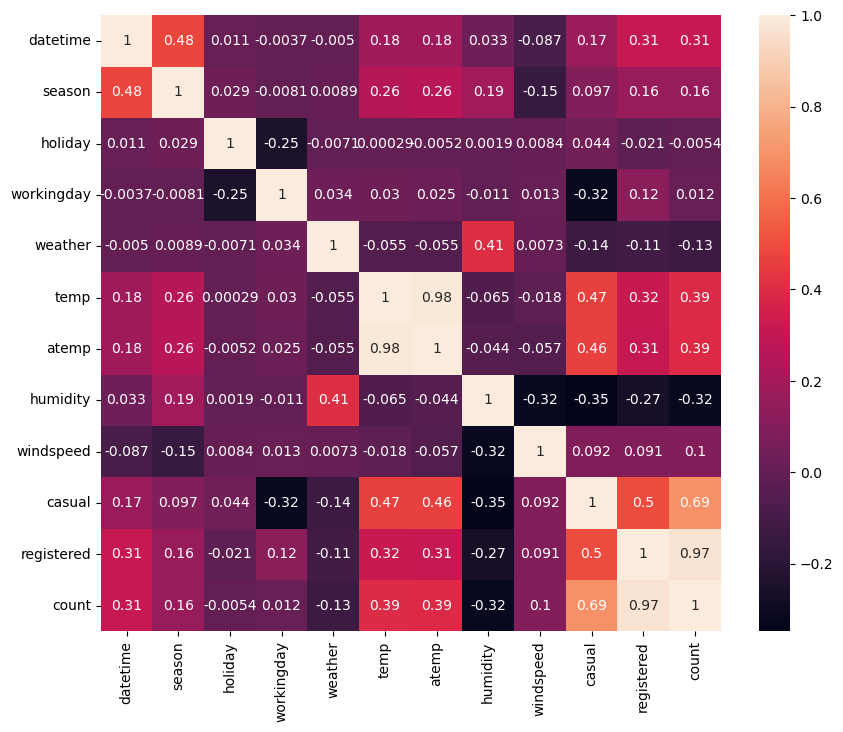

In [28]:
plt.figure(figsize=(10, 8))  
annot_kws = {"fontsize": 10, "ha": 'center', "va": 'center'}

sns.heatmap(df.corr(), annot=True, annot_kws=annot_kws)
plt.show()

**Hypothesis Testing - 1**

1. Null Hypothesis (H0): There is no relationship between weather and the season.
2. Alternate Hypothesis (H1): There is a relationship between weather and the season.
3. Significance level (alpha): 0.05.
4. We will employ the chi-square test to examine the hypothesis stated above.

In [29]:
table_data = pd.crosstab(df['season'], df['weather'])
print("Recorded data:")
table_data

Recorded data:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [30]:
value = stats.chi2_contingency(table_data)
values_expected = value[3]
values_expected

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [35]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

chi_sqr = sum([(o-e)**2/e for o, e in zip(table_data.values, values_expected)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


**Hypothesis Testing - 2**

1. Null Hypothesis: There is no impact of working days on the rental volume of cycles.
2. Alternate Hypothesis: Working days influence the rental volume of cycles.
3. Significance level (alpha): 0.05.
4. We will utilize the 2-Sample T-Test to assess the hypothesis stated above.

In [37]:
grp1 = df[df['workingday']==0]['count'].values
grp2 = df[df['workingday']==1]['count'].values

np.var(grp1), np.var(grp2)

(30171.346098942427, 34040.69710674686)

1. Before proceeding with the two-sample T-Test, it's necessary to determine if the data groups have equal variance.
2. If the ratio of the larger data group's variance to the smaller data group's variance is less than 4:1, it suggests equal variance.
3. In this case, the ratio of variances, calculated as 34040.70 / 30171.35, is less than 4:1.
4. Therefore, we can consider that the given data groups have equal variance.

In [38]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since the p-value exceeds 0.05, we fail to reject the null hypothesis. This indicates that we lack sufficient evidence to conclude that working days have an effect on the number of cycles being rented.

**Hypothesis Testing - 3**

1. Null Hypothesis: The number of cycles rented remains consistent across different weather and seasons.
2. Alternate Hypothesis: The number of cycles rented varies across different weather and seasons.
3. Significance level (alpha): 0.05.
4. We will employ ANOVA to assess the hypothesis outlined above.

In [39]:
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)


F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

As the p-value is below 0.05, we reject the null hypothesis. This suggests that there are differences in the number of cycles rented across different weather and season conditions.

**Insights:**

1. Bike rentals peak during summer and fall compared to other seasons.
2. Holidays see higher bike rental rates.
3. Weekends and holidays experience slightly elevated rental activity.
4. Inclement weather like rain, thunderstorms, snow, or fog leads to decreased bike rentals.
5. Low humidity levels, temperatures below 10 degrees Celsius, and high windspeeds above 35 km/h correlate with lower bike rental numbers.

**Recommendations:**

1. Increase bike inventory during summer and fall to meet heightened demand.
2. Working days do not significantly affect bike rental numbers (significance level: 0.05).
3. Reduce bike inventory during periods of very low humidity.
4. Adjust bike stock during cold days with temperatures below 10 degrees Celsius.
5. Decrease bike inventory during high windspeeds exceeding 35 km/h or during thunderstorms.